# 1. 데이터 불러오기

In [13]:
import os
from dotenv import load_dotenv
import requests
from urllib.parse import unquote 

load_dotenv()

key = os.getenv("PUBLIC_META_API_KEY")

In [23]:
#https://api.odcloud.kr/api/15156218/v1/uddi:7ca5438f-8536-41e4-834c-e84342af6bbc?page=1&perPage=1000&returnType=JSON
#https://api.odcloud.kr/api/15156218/v1/uddi:7ca5438f-8536-41e4-834c-e84342af6bbc?page=1&perPage=1000&returnType=json&serviceKey=737d574ee5cf5d7b84663396d2e074fc4c0b828ae0b2f9e6d19c439c84600ff5
service_key = "737d574ee5cf5d7b84663396d2e074fc4c0b828ae0b2f9e6d19c439c84600ff5"
page = 1
base_url = f"https://api.odcloud.kr/api/15156218/v1/uddi:7ca5438f-8536-41e4-834c-e84342af6bbc?page={page}&perPage=1000&returnType=json&serviceKey={service_key}"

response = requests.get(base_url)

In [26]:
data = response.json()

data

{'currentCount': 1000,
 'data': [{'개체명(기업_기관)': 'WS 우승, 스탠, 탬파베이 레이스, 오클랜드 애슬레틱스, EPA연합뉴스, 양키즈, 양키스, UPI, 다저스, 자이언츠, 월드시리즈, 로키스, LA 다저스, 폭스스포츠, AP연합뉴스, 샌디에이고 파드리스, 텍사스 레인저스, 후안, ML',
   '개체명(인물)': '고메스, 브랜든, 크리스, 요시노부, 타일러, 글래스노우, 오타니, 쇼헤이',
   '개체명(지역)': '플로리다주, 애틀랜타, 미국, 로스앤젤레스, 일본, 뉴욕, 미국프, 캘리포니아주, 다저스타디움, 한국, 세인트피터즈버그',
   '언론사': '부산일보',
   '일자': '2024-01-01',
   '제목': '오타니·야마모토·글래스노우 품은 LA 다저스, WS 우승 0순위',
   '키워드': '오타니,야마모토,글래스노우,LA,다저스,0순위,WS,우승,폭스스포츠,MLB,우승,배당,순위,공개,애틀랜타,브레이브스,뉴욕,양키즈,2·3위,로스앤젤레스,지난달,미국,캘리포니아주,로스앤젤레스,다저스,입단,회견,오타니,쇼헤이,질문,답변,EPA연합뉴스,야마모토,요시노부,사진,다저스타디움,지난달,미국,로스앤젤레스,기자회견,브랜든,고메스,수석,부사장,단장,오른쪽,스탠,카스텐,구단,회장,유니폼,포즈,UPI연합뉴스,로스앤젤레스,다저스,글래스노우,영입,플로리다주,세인트피터즈버그,1차,AL,와일드,카드,플레이오프,시리즈,글래스노우,탬파베이,레이스,선발,투수,텍사스,레인저스,상대,모습,AP연합뉴스,미국프로야구,MLB,스토브리그,최대,오타니,쇼헤이,야마모토,요시노부,영입,로스앤젤레스,다저스,예상,월드시리즈,WS,후보,우승,평가,미국,폭스,스포츠,첫날,1일,한국시간,순위,빅리그,구단,WS,우승,배당,홈페이지,게재,다저스,10달러,달러,기록,배당률,1위,배당률,우승,가능,애틀랜타,브레이브스,10달러,달러,획득,2위,뉴욕,양키스,3위,다저스,투타,겸업,세계적,아이콘,오타니,일본,최고,요시노부,투수,야마모토,투자,달러,다저스,트레이드,투수,

In [27]:
total_count = data['totalCount']
print(total_count)

33454


In [37]:
print(type(data))

<class 'dict'>


In [45]:
date_list = []

for i in range(0,total_count,1000) :
    page = int(i / 1000) + 1

    base_url = f"https://api.odcloud.kr/api/15156218/v1/uddi:7ca5438f-8536-41e4-834c-e84342af6bbc?page={page}&perPage=1000&returnType=json&serviceKey={service_key}"

    response = requests.get(base_url)
    data = response.json()

    for item in data['data']:
        item_list = []
        if item["통합 분류1"] == "스포츠>야구" or item["통합 분류2"] == "스포츠>야구":
            key_date = item["일자"]
            key_title = item["제목"]
            key_word = item["키워드"]

            item_list = {
                "date" : key_date,
                "title" : key_title,
                "keyword" : key_word
            }
            date_list.append(item_list)
    

    if i % 100 == 0:
        print(f"-------------------- page : {page} --------------------")


-------------------- page : 1 --------------------
-------------------- page : 2 --------------------
-------------------- page : 3 --------------------
-------------------- page : 4 --------------------
-------------------- page : 5 --------------------
-------------------- page : 6 --------------------
-------------------- page : 7 --------------------
-------------------- page : 8 --------------------
-------------------- page : 9 --------------------
-------------------- page : 10 --------------------
-------------------- page : 11 --------------------
-------------------- page : 12 --------------------
-------------------- page : 13 --------------------
-------------------- page : 14 --------------------
-------------------- page : 15 --------------------
-------------------- page : 16 --------------------
-------------------- page : 17 --------------------
-------------------- page : 18 --------------------
-------------------- page : 19 --------------------
-------------------- 

In [48]:
import pandas as pd

df = pd.DataFrame(date_list)

df.head()

df.to_csv("공공데이터_메타데이터_야구데이터.csv", index=False)

In [49]:
from konlpy.tag import Okt

okt = Okt()

In [64]:
# 단어 리스트 만들기

words_list = []
drop_list = []

df.head()

i = 1
for line in df["keyword"]:

    #print(line[:40])
    #clean_line = re.sub("[^1-9a-zA-Z가-핳\s]","",line)
    #print(clean_line[:40])
    #line_pos = okt.pos(line)
    #print("-"*30)
    clean_line = df["keyword"].str.split(",")
    for word in clean_line:
        if word[0] in drop_list : continue
        
        words_list.append(word[0])
    #if i == 1:break

    i += 1

KeyboardInterrupt: 

In [59]:
import numpy as np
print(words_list)
print(np.array(words_list).shape)

['오타니', '한화', '기운', '근본', '뷰캐넌', '프로', '이정후', '청룡', 'KIA', '마틴', '오타니', '안치홍', '용띠', '전설', '송구', '류현진', '청룡', '결국', 'MLB', '이름', 'KIA', '집토끼', '오타니', '부상', '그라운드', '최강야구', '홈런', '트리오', '류현진', '뉴진스', '용띠', '광현종', '14살', '최강', '김하성', '청룡', '기조', '로봇심판', '퓨처스', 'MLB', '가을야구', '류현진', '야구팬', '승천', '선배', '고우석', '고우석', '새해', '고우석', 'KBO', '동갑', '24시간', '고우석', '대박', '연봉', '2024프로', '처남', 'MLB', '고우석', '처남', 'MLB', '불티나', '격동', '고우석', '고우석', 'MLB', '로봇심판', 'KBO', '김강민', '정규시즌', '우승', '고우석', '삼성', '손주환', '타격', '계약', '손주환', 'KBO', 'LG', '신년사', 'LG', '고우석', '고우석', '고우석', '무적', '프로', '드림', '삼성', '급물살', 'LG', '손주환', '롯데', '매제', '29번', '류현진', '듀오', '고우석', '7개월', '프로', 'LG', '기운', '선수들', '포스팅', 'LG', '이정후', '손주환', '고우석', '고우석', '확정', '강건', 'LG', '고우석', '시즌', '프로', '서건창', 'MLB', '이름', '김양희', '김양희', 'KIA', 'KIA', '삼성', '고우석', '김선빈', '원클럽맨', '고우석', 'MLB행', '류현진', '영원', '포스팅비', '거인', '명가', '고우석', '마지막', '고우석vs마츠이', '마무리', '달러', '샌디에이고', 'KBO', 'KIA', '타율', 'KIA', 'MLB', '마무리', '이종범', 'KBO', '경기', '프로', '1

In [60]:
from collections import Counter

word_cnt = Counter(words_list)

In [61]:
word_cnt_most = dict(word_cnt.most_common(30))

In [62]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

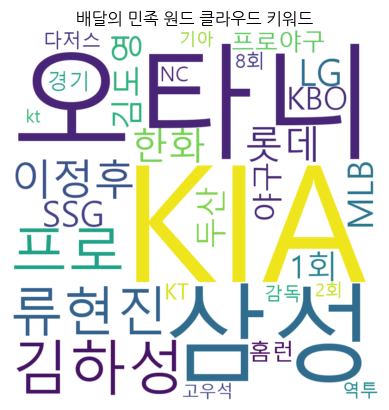

In [63]:
from wordcloud import WordCloud
wc = WordCloud(
    font_path="C\Windows\fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=800
)

wc.generate_from_frequencies(word_cnt_most)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 원드 클라우드 키워드")
plt.show()